<a href="https://colab.research.google.com/github/Samarth23-sudo/LungAI-Pneumonia-Detection-with-Deep-Learning/blob/main/Pnemonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lungs Pnemonia Detection


### Dataset Description
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:20<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd

path = os.path.join(path, 'chest_xray')

list_of_classes = os.listdir(path)
print(list_of_classes)

# Define paths
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
val_dir = os.path.join(path, 'val')




['chest_xray', 'train', 'val', '__MACOSX', 'test']


Train distribution: {'PNEUMONIA': 3875, 'NORMAL': 1341}
Test distribution: {'PNEUMONIA': 390, 'NORMAL': 234}
Validation distribution: {'PNEUMONIA': 8, 'NORMAL': 8}


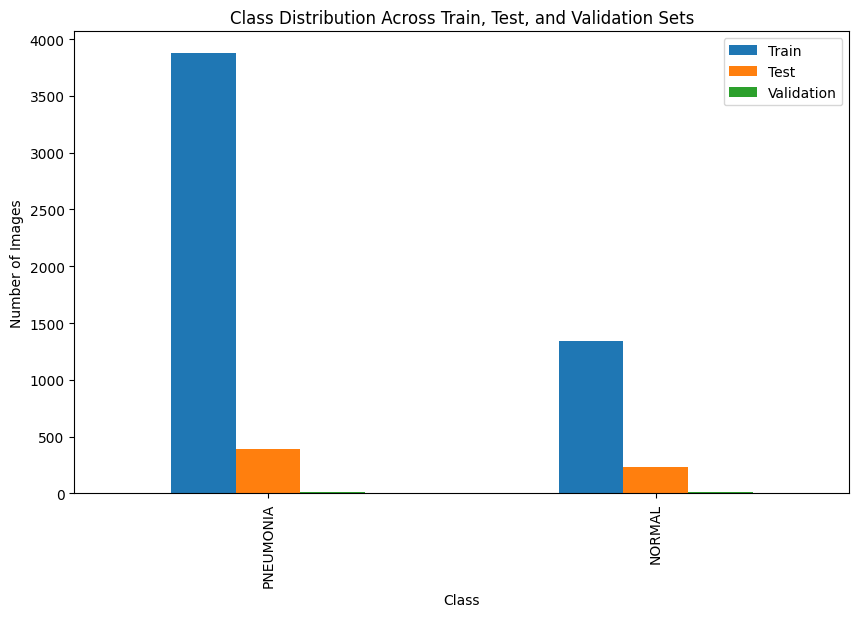

In [3]:
def get_class_distribution(directory):
    distribution = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            distribution[class_dir] = len(os.listdir(class_path))
    return distribution

train_distribution = get_class_distribution(train_dir)
test_distribution = get_class_distribution(test_dir)
val_distribution = get_class_distribution(val_dir)

# Display distributions
print("Train distribution:", train_distribution)
print("Test distribution:", test_distribution)
print("Validation distribution:", val_distribution)

data = {
    'Train': train_distribution,
    'Test': test_distribution,
    'Validation': val_distribution
}
distribution_df = pd.DataFrame(data)

# Plot distribution
distribution_df.plot(kind='bar', figsize=(10, 6))
plt.title('Class Distribution Across Train, Test, and Validation Sets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()



The data has more Pneumonia data points as compared to normal.

**Shuffle and re-distribute data in the ratio 70:10:20
(train:val:test)**

In [4]:
import os
import random
import shutil

# seed for reproducibility
random.seed(42)

# Define paths
base_path = path
original_train_dir = os.path.join(base_path, 'train')
original_test_dir = os.path.join(base_path, 'test')
original_val_dir = os.path.join(base_path, 'val')

# Create lists to store image paths and labels
all_images = []

# extract images and labels from train, test, and val folders
for dataset_dir in [original_train_dir, original_test_dir, original_val_dir]:
    for label in ['NORMAL', 'PNEUMONIA']:
        label_dir = os.path.join(dataset_dir, label)
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            all_images.append((img_path, label))

# shuffle the images
random.shuffle(all_images)

# Split into 70:10:20 for train, val, and test sets
train_split = int(0.7 * len(all_images))
val_split = int(0.1 * len(all_images)) + train_split

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

# Paths to new folders
new_train_dir = os.path.join(base_path, 'new_train')
new_val_dir = os.path.join(base_path, 'new_val')
new_test_dir = os.path.join(base_path, 'new_test')

# Function to create directory structure
def create_directory_structure(base_dir):
    for label in ['NORMAL', 'PNEUMONIA']:
        os.makedirs(os.path.join(base_dir, label), exist_ok=True)

create_directory_structure(new_train_dir)
create_directory_structure(new_val_dir)
create_directory_structure(new_test_dir)

# Function to move images to new directories
def move_images(image_list, base_dir):
    for img_path, label in image_list:
        dest_dir = os.path.join(base_dir, label)
        shutil.copy(img_path, dest_dir)

# Move images to their respective new folders
move_images(train_images, new_train_dir)
move_images(val_images, new_val_dir)
move_images(test_images, new_test_dir)

print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")


Train set: 4099 images
Validation set: 585 images
Test set: 1172 images


Train distribution: {'PNEUMONIA': 3005, 'NORMAL': 1094}
Test distribution: {'PNEUMONIA': 855, 'NORMAL': 317}
Validation distribution: {'PNEUMONIA': 413, 'NORMAL': 172}


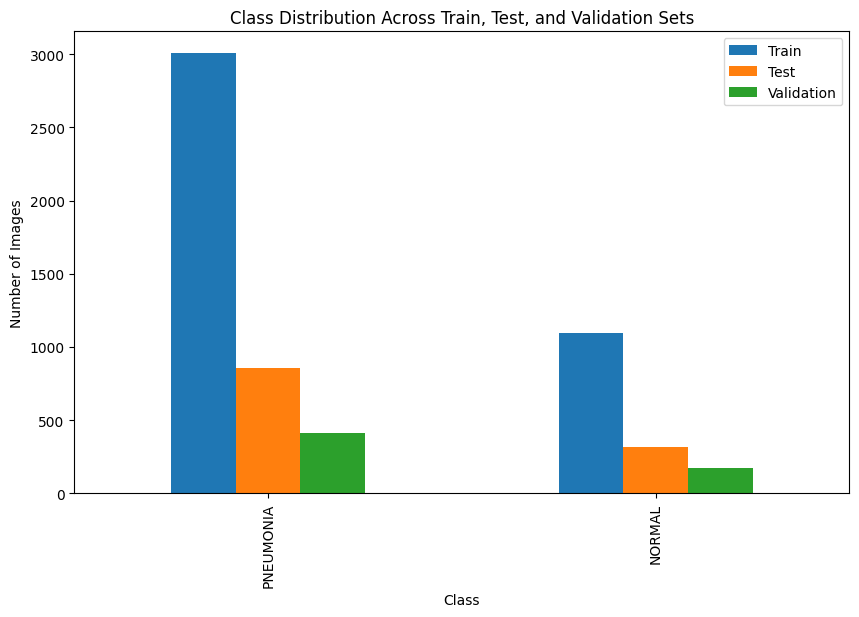

In [5]:
new_train_distribution = get_class_distribution(new_train_dir)
new_test_distribution = get_class_distribution(new_test_dir)
new_val_distribution = get_class_distribution(new_val_dir)

# Display distributions
print("Train distribution:", new_train_distribution)
print("Test distribution:", new_test_distribution)
print("Validation distribution:", new_val_distribution)

data = {
    'Train': new_train_distribution,
    'Test': new_test_distribution,
    'Validation': new_val_distribution
}
distribution_df = pd.DataFrame(data)

# Plot distribution
distribution_df.plot(kind='bar', figsize=(10, 6))
plt.title('Class Distribution Across Train, Test, and Validation Sets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

This distribution has 2 beinifits:  
1) Avoid overfitting to training dataset  
2) Better hyperparameter tuning

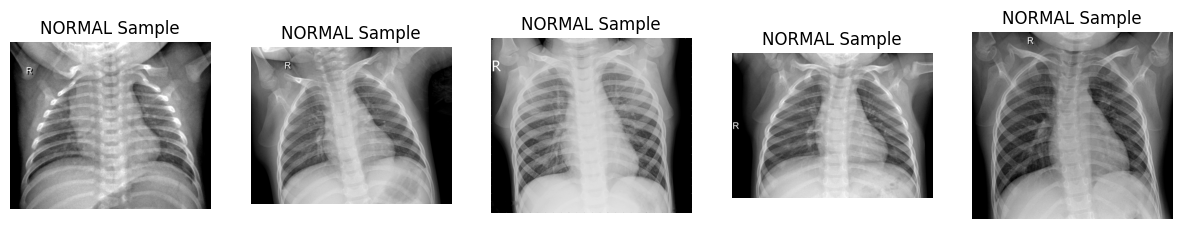

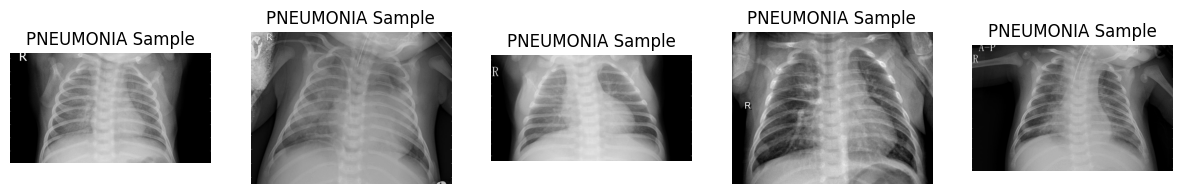

In [6]:
def plot_sample_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    images = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{class_name} Sample')
        plt.axis('off')
    plt.show()

plot_sample_images(new_train_dir, 'NORMAL')
plot_sample_images(new_train_dir, 'PNEUMONIA')


In [ ]:
def analyze_image_sizes(directory):
    sizes = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            sizes.append(img.size)

    sizes = np.array(sizes)
    print("Image size - Mean:", np.mean(sizes, axis=0))
    print("Image size - Std Dev:", np.std(sizes, axis=0))

# Analyze image sizes in the train set
analyze_image_sizes(train_dir)


Image size - Mean: [1320.61081288  968.07476994]
Image size - Std Dev: [355.26468303 378.81937267]


In [ ]:
def plot_pixel_intensity_distribution(directory, class_name, num_images=50):
    pixel_values = []
    class_path = os.path.join(directory, class_name)
    for img_name in os.listdir(class_path)[:num_images]:
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        pixel_values.extend(np.array(img).flatten())

    sns.histplot(pixel_values, bins=50, kde=True)
    plt.title(f'Pixel Intensity Distribution - {class_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot pixel intensity for each class in the train set
plot_pixel_intensity_distribution(train_dir, 'NORMAL')
plot_pixel_intensity_distribution(train_dir, 'PNEUMONIA')


## Dataloader

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class PneumoniaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Custom Dataset for loading pneumonia images from a directory with subfolders as labels.

        Args:
        - root_dir (str): Path to the directory containing labeled subdirectories.
        - transform (callable, optional): Optional transform to be applied on an image sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Populate image_paths and labels
        for label, subfolder in enumerate(['NORMAL', 'PNEUMONIA']):
            folder_path = os.path.join(root_dir, subfolder)
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)  # 0 for NORMAL, 1 for PNEUMONIA

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")  # Convert to RGB
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [8]:
# Define transformations for train and test/validation sets
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),               # Resize images to a standard size
    # transforms.RandomHorizontalFlip(),           # Apply random horizontal flip
    # transforms.RandomRotation(15),               # Apply random rotation within [-15, 15] degrees
    # transforms.ColorJitter(brightness=0.2,       # Adjust brightness, contrast, etc.
    #                        contrast=0.2,
    #                        saturation=0.2,
    #                        hue=0.1),
    transforms.ToTensor(),                       # Convert image to PyTorch tensor
])

test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),               # Resize images to a standard size
    transforms.ToTensor(),                       # Convert image to PyTorch tensor
])


In [9]:
# Create datasets with transformations
train_dataset = PneumoniaDataset(root_dir=new_train_dir, transform=train_transforms)
val_dataset = PneumoniaDataset(root_dir=new_val_dir, transform=test_transforms)
test_dataset = PneumoniaDataset(root_dir=new_test_dir, transform=test_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


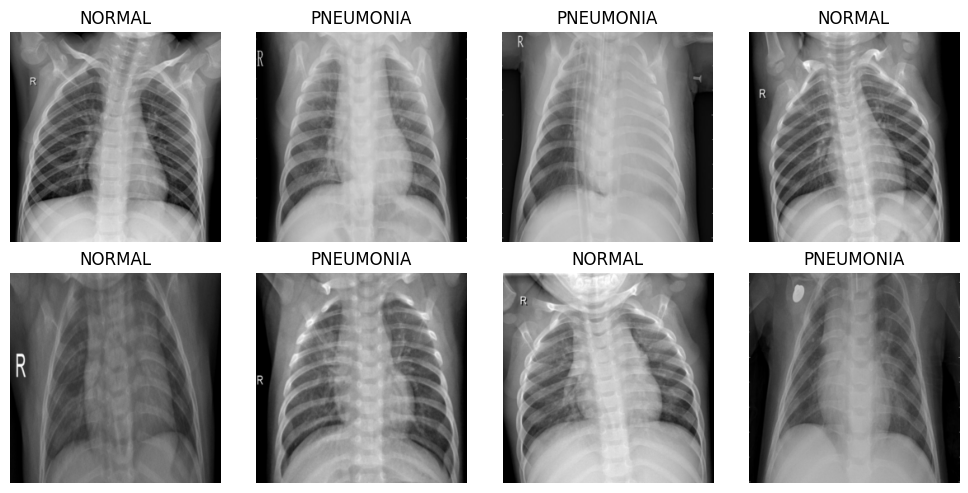

In [10]:
import matplotlib.pyplot as plt

# Load a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Define class names
class_names = ["NORMAL", "PNEUMONIA"]

# Display a few images
plt.figure(figsize=(10, 5))
for i in range(8):  # Display the first 8 images in the batch
    plt.subplot(2, 4, i + 1)
    img = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C) for display
    plt.imshow(img)
    plt.title(class_names[labels[i].item()])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNClassifier(nn.Module):
    def __init__(self, task='classification', num_conv_layers=3, dropout_rate=0.5):
        super(CNNClassifier, self).__init__()
        self.task = task
        self.num_conv_layers = num_conv_layers
        self.dropout_rate = dropout_rate

        # Define convolutional layers and batch normalization layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Define pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Define fully connected layers based on the number of convolutional layers used
        if self.num_conv_layers == 1:
            self.fc1 = nn.Linear(32 * 128 * 128, 256)
        elif self.num_conv_layers == 2:
            self.fc1 = nn.Linear(64 * 64 * 64, 256)
        else:
            self.fc1 = nn.Linear(128 * 32 * 32, 256)

        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)  # Output layer for binary classification or regression

        # Define dropout layer
        self.dropout = nn.Dropout(p=dropout_rate)

    def forward(self, x):
        # First conv layer
        x = self.pool(F.relu(self.bn1(self.conv1(x))))

        # Second conv layer if num_conv_layers > 1
        if self.num_conv_layers > 1:
            x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Third conv layer if num_conv_layers > 2
        if self.num_conv_layers > 2:
            x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Flatten the output for fully connected layers
        x = x.view(x.shape[0], -1)

        # Pass through fully connected layers with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))

        # Output layer
        x = self.fc3(x)

        # Apply task-specific output activation
        if self.task == 'classification':
            return F.log_softmax(x, dim=1)  # For classification
        else:
            return x  # Raw output for regression or other tasks


In [35]:
# Initialize the model
model = CNNClassifier(task='classification')

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training model

In [ ]:
# Training loop

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i + 1) % 20 == 0:  # Print every 20 batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 20:.4f}')
            running_loss = 0.0

print("Training complete.")


### Model Summary

In [30]:
from torchsummary import summary

def model_summary(model, input_size):
    return summary(model, input_size)

model_summary(model, (3, 256, 256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
       BatchNorm2d-2         [-1, 32, 256, 256]              64
         MaxPool2d-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          18,496
       BatchNorm2d-5         [-1, 64, 128, 128]             128
         MaxPool2d-6           [-1, 64, 64, 64]               0
            Conv2d-7          [-1, 128, 64, 64]          73,856
       BatchNorm2d-8          [-1, 128, 64, 64]             256
         MaxPool2d-9          [-1, 128, 32, 32]               0
           Linear-10                  [-1, 256]      33,554,688
           Linear-11                  [-1, 128]          32,896
           Linear-12                    [-1, 2]             258
Total params: 33,681,538
Trainable params: 33,681,538
Non-trainable params: 0
-------------------------

### Testing

Accuracy: 0.90
Precision: 0.88
Recall: 1.00
F1 Score: 0.94


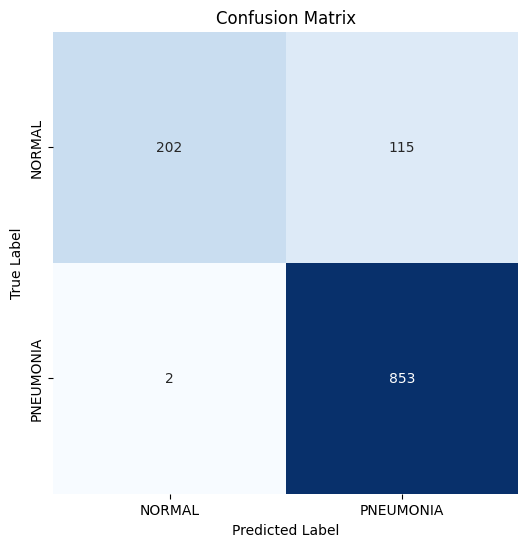

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

def evaluate_model(model, test_loader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, pos_label=1)  # Assumes '1' is PNEUMONIA
    recall = recall_score(all_labels, all_preds, pos_label=1)
    f1 = f1_score(all_labels, all_preds, pos_label=1)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


# evaluate_model(model, test_loader, device)

evaluate_model(model, test_loader, device)


### Hyperparameter Tuning


Training with config: {'num_conv_layers': 2, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'optimizer': 'adam'}
Epoch [1/5], Step [20/129], Loss: 6.3103
Epoch [1/5], Step [40/129], Loss: 1.1495
Epoch [1/5], Step [60/129], Loss: 0.6707
Epoch [1/5], Step [80/129], Loss: 0.4361
Epoch [1/5], Step [100/129], Loss: 0.6802
Epoch [1/5], Step [120/129], Loss: 0.3311
Epoch [1/5], Validation Loss: 0.1669
Epoch [2/5], Step [20/129], Loss: 0.1990
Epoch [2/5], Step [40/129], Loss: 0.2741
Epoch [2/5], Step [60/129], Loss: 0.1541
Epoch [2/5], Step [80/129], Loss: 0.1267
Epoch [2/5], Step [100/129], Loss: 0.1562
Epoch [2/5], Step [120/129], Loss: 0.1179
Epoch [2/5], Validation Loss: 0.1250
Epoch [3/5], Step [20/129], Loss: 0.1267
Epoch [3/5], Step [40/129], Loss: 0.1139
Epoch [3/5], Step [60/129], Loss: 0.1563
Epoch [3/5], Step [80/129], Loss: 0.1582
Epoch [3/5], Step [100/129], Loss: 0.1569
Epoch [3/5], Step [120/129], Loss: 0.1366
Epoch [3/5], Validation Loss: 0.1900
Epoch [4/5], Step [20/129], Loss:

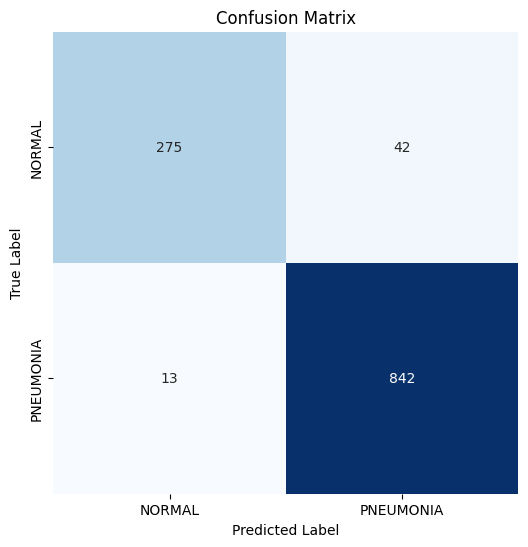


Training with config: {'num_conv_layers': 2, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'optimizer': 'sgd'}
Epoch [1/5], Step [20/129], Loss: 0.5213
Epoch [1/5], Step [40/129], Loss: 0.3523
Epoch [1/5], Step [60/129], Loss: 0.3214
Epoch [1/5], Step [80/129], Loss: 0.2529
Epoch [1/5], Step [100/129], Loss: 0.2352
Epoch [1/5], Step [120/129], Loss: 0.2119
Epoch [1/5], Validation Loss: 0.2249
Epoch [2/5], Step [20/129], Loss: 0.2028
Epoch [2/5], Step [40/129], Loss: 0.1857
Epoch [2/5], Step [60/129], Loss: 0.2032
Epoch [2/5], Step [80/129], Loss: 0.1582
Epoch [2/5], Step [100/129], Loss: 0.1714
Epoch [2/5], Step [120/129], Loss: 0.1425
Epoch [2/5], Validation Loss: 0.1657
Epoch [3/5], Step [20/129], Loss: 0.1487
Epoch [3/5], Step [40/129], Loss: 0.1392
Epoch [3/5], Step [60/129], Loss: 0.1482
Epoch [3/5], Step [80/129], Loss: 0.1479
Epoch [3/5], Step [100/129], Loss: 0.1514
Epoch [3/5], Step [120/129], Loss: 0.1553
Epoch [3/5], Validation Loss: 0.1239
Epoch [4/5], Step [20/129], Loss: 

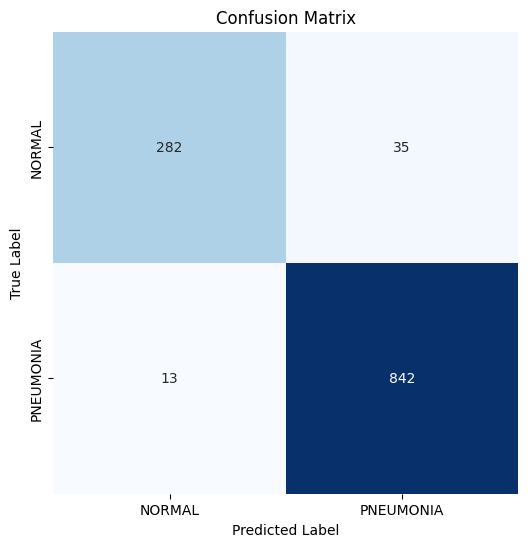


Training with config: {'num_conv_layers': 3, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'optimizer': 'adam'}
Epoch [1/5], Step [20/129], Loss: 2.5130
Epoch [1/5], Step [40/129], Loss: 0.5115
Epoch [1/5], Step [60/129], Loss: 0.3348
Epoch [1/5], Step [80/129], Loss: 0.2130
Epoch [1/5], Step [100/129], Loss: 0.1788
Epoch [1/5], Step [120/129], Loss: 0.2004
Epoch [1/5], Validation Loss: 0.1259
Epoch [2/5], Step [20/129], Loss: 0.1767
Epoch [2/5], Step [40/129], Loss: 0.1540
Epoch [2/5], Step [60/129], Loss: 0.1543
Epoch [2/5], Step [80/129], Loss: 0.1681
Epoch [2/5], Step [100/129], Loss: 0.1742
Epoch [2/5], Step [120/129], Loss: 0.1742
Epoch [2/5], Validation Loss: 0.1820
Epoch [3/5], Step [20/129], Loss: 0.1587
Epoch [3/5], Step [40/129], Loss: 0.1256
Epoch [3/5], Step [60/129], Loss: 0.1245
Epoch [3/5], Step [80/129], Loss: 0.0904
Epoch [3/5], Step [100/129], Loss: 0.1974
Epoch [3/5], Step [120/129], Loss: 0.0955
Epoch [3/5], Validation Loss: 0.1032
Epoch [4/5], Step [20/129], Loss:

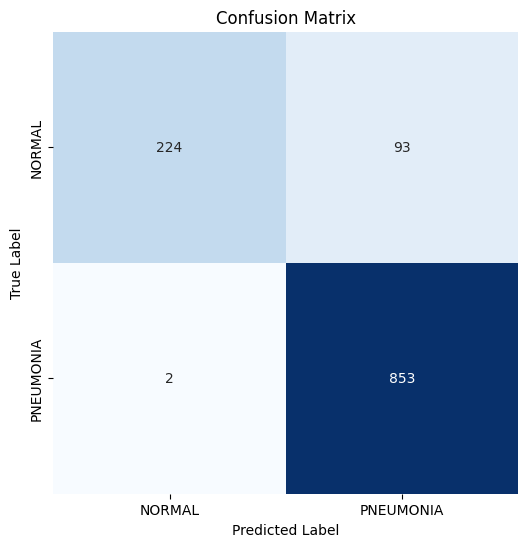


Training with config: {'num_conv_layers': 3, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'optimizer': 'sgd'}
Epoch [1/5], Step [20/129], Loss: 0.5425
Epoch [1/5], Step [40/129], Loss: 0.3746
Epoch [1/5], Step [60/129], Loss: 0.3500
Epoch [1/5], Step [80/129], Loss: 0.2626
Epoch [1/5], Step [100/129], Loss: 0.2245
Epoch [1/5], Step [120/129], Loss: 0.2372
Epoch [1/5], Validation Loss: 0.1723
Epoch [2/5], Step [20/129], Loss: 0.2064
Epoch [2/5], Step [40/129], Loss: 0.2146
Epoch [2/5], Step [60/129], Loss: 0.1930
Epoch [2/5], Step [80/129], Loss: 0.1785
Epoch [2/5], Step [100/129], Loss: 0.1794
Epoch [2/5], Step [120/129], Loss: 0.1654
Epoch [2/5], Validation Loss: 0.2368
Epoch [3/5], Step [20/129], Loss: 0.1781
Epoch [3/5], Step [40/129], Loss: 0.1676
Epoch [3/5], Step [60/129], Loss: 0.1620
Epoch [3/5], Step [80/129], Loss: 0.1456
Epoch [3/5], Step [100/129], Loss: 0.1408
Epoch [3/5], Step [120/129], Loss: 0.1590
Epoch [3/5], Validation Loss: 0.1491
Epoch [4/5], Step [20/129], Loss: 

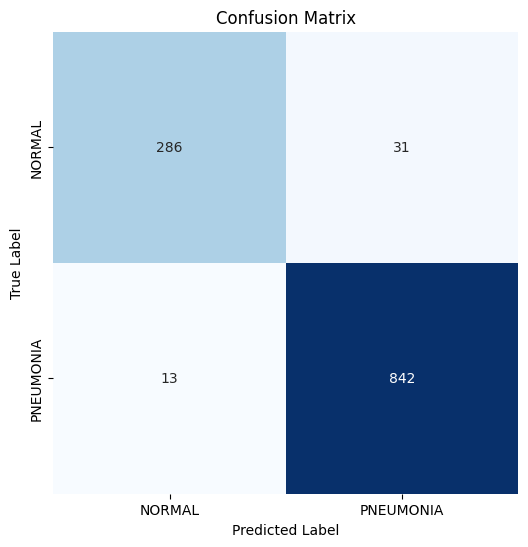

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define hyperparameters to try
hyperparams = [
    {'num_conv_layers': 2, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'optimizer': 'adam'},
    {'num_conv_layers': 2, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'optimizer': 'sgd'},
    {'num_conv_layers': 3, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'optimizer': 'adam'},
    {'num_conv_layers': 3, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'optimizer': 'sgd'}
]

best_val_loss = float('inf')
best_model = None

num_epochs = 5

# Dictionary to store results
tuning_results = {}

for config in hyperparams:
    print(f"\nTraining with config: {config}")

    # Initialize model
    model = CNNClassifier(num_conv_layers=config['num_conv_layers'], dropout_rate=config['dropout_rate']).to(device)

    # Define criterion
    criterion = nn.CrossEntropyLoss()

    # Define optimizer based on configuration
    if config['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
    elif config['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=config['learning_rate'])

    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(train_loader):
            # Move data to device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if (i + 1) % 20 == 0:  # Print every 20 batches
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 20:.4f}")
                running_loss = 0.0

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss / len(val_loader):.4f}")

    # Keep track of the best model
    if len(val_losses)>0 and val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = model
        torch.save(best_model.state_dict(), 'best_model.pth')
        print(f"New best model saved with validation loss: {best_val_loss:.4f}")

    # Store results
    tuning_results[str(config)] = {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

    evaluate_model(model, test_loader, device)

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
for config, losses in tuning_results.items():
    plt.plot(losses['train_losses'], label=f"Train Loss - {config}")
    plt.plot(losses['val_losses'], label=f"Val Loss - {config}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Losses for Different Configurations")
plt.show()


In [ ]:
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.eval()  # Set the model to evaluation mode

# Move the model to the appropriate device
best_model.to(device)

model_summary(best_model, (3, 256, 256))

evaluate_model(best_model, test_loader, device)